In [33]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import numpy as np
%matplotlib inline

In [34]:
file_path = "/Users/talibahtimothy/Desktop/dataanalyticsassignments/Project4_UCI_Academic_Factors/Resources/cleaned_student_mat.csv"
data = pd.read_csv(file_path)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/talibahtimothy/Desktop/dataanalyticsassignments/Project4_UCI_Academic_Factors/Resources/cleaned_student_mat.csv'

In [ ]:
#Uncomment the next few lines of code to run the csv file. Alternative code from the Student_Predictor.ipynb
# Load the dataset
#data = pd.read_csv('Resources/student-mat.csv', delimiter=';')

In [ ]:
#Uncomment the next few lines of code to run the csv file. Alternative code from the Student_Predictor.ipynb
# Remove unnecessary columns
#columns_to_remove = ["G1", "G2", "Walc", "address", "famrel", "Dalc", "guardian", "famsize"]
#data.drop(columns=[col for col in columns_to_remove if col in data.columns], errors='ignore', inplace=True)

In [ ]:
#Uncomment the next few lines of code to run the csv file. Alternative code from the Student_Predictor.ipynb
# Rename columns
#data.rename(columns={"G3": "final_grade", "studytime": "Study_Time_Hours", "Fedu": "Father_Edu", "Medu": "Mother_Edu", "Pstatus": "Parent_status"}, inplace=True)

In [ ]:
#Uncomment the next few lines of code to run the csv file. Alternative code from the Student_Predictor.ipynb
# Convert 'yes'/'no' to 0's and 1's
#binary_columns = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
#for col in binary_columns:
    #if col in data.columns:
        #data[col] = data[col].map({'yes': 1, 'no': 0})

In [ ]:
#Uncomment the next few lines of code to run the csv file. Alternative code from the Student_Predictor.ipynb
# Handle missing values: Fill with mean for 'absences'
#if 'absences' in data.columns:
    #data['absences'].fillna(data['absences'].mean(), inplace=True)

In [ ]:
data["Pass_Fail"] = (data["final_grade"] >= 15).astype(int)

In [ ]:
data

In [ ]:
X = data.drop(columns = ["final_grade", "Pass_Fail"])
y = data["Pass_Fail"]

In [ ]:
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [44]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [50]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [52]:
print(accuracy)
print(classification_report(y_test, y_pred))

0.7721518987341772
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        59
           1       0.67      0.20      0.31        20

    accuracy                           0.77        79
   macro avg       0.72      0.58      0.59        79
weighted avg       0.75      0.77      0.72        79



In [54]:
feature_importance = pd.DataFrame({
    "Feature": data.drop(columns=["final_grade", "Pass_Fail"]).columns,
    "Coefficient": np.abs(model.coef_[0])  # Absolute values of coefficients
}).sort_values(by = "Coefficient", ascending = False)

In [56]:
print(feature_importance)

             Feature  Coefficient
11          failures     0.635502
17            higher     0.625402
18          internet     0.587916
12         schoolsup     0.547317
4         Mother_Edu     0.424267
23          absences     0.368061
10  Study_Time_Hours     0.272084
2                age     0.235539
13            famsup     0.213611
5         Father_Edu     0.177358
22            health     0.175314
14              paid     0.171078
1                sex     0.138220
15        activities     0.127726
7               Fjob     0.125014
21             goout     0.106586
19          romantic     0.104571
3      Parent_status     0.093579
20          freetime     0.072981
6               Mjob     0.039360
0             school     0.036183
16           nursery     0.034166
9         traveltime     0.033220
8             reason     0.005894


In [58]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [60]:

# Creating StandardScaler instance
scaler = StandardScaler()

In [62]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [64]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [66]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [68]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [70]:
# Making predictions using the testing data
randomforest_predictions = rf_model.predict(X_test_scaled)

In [72]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, randomforest_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, randomforest_predictions)

In [74]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, randomforest_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,75,1
Actual 1,21,2


Accuracy Score : 0.7777777777777778
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.99      0.87        76
           1       0.67      0.09      0.15        23

    accuracy                           0.78        99
   macro avg       0.72      0.54      0.51        99
weighted avg       0.75      0.78      0.71        99



In [76]:
# Replace with your actual feature names
feature_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4','Feature5','Feature6','Feature7','Feature8','Feature9','Feature10']  # List of feature names corresponding to X columns

# Calculate feature importances
importances = rf_model.feature_importances_

# Sort the features by importance
sorted_importances = sorted(zip(importances, feature_names), reverse=True)

# Print the sorted feature importances
for importance, feature in sorted_importances:
    print(f"Feature: {feature}, Importance: {importance}")


Feature: Feature3, Importance: 0.07923528300211116
Feature: Feature5, Importance: 0.060219595975217824
Feature: Feature8, Importance: 0.06020794556199066
Feature: Feature6, Importance: 0.05716366310125532
Feature: Feature7, Importance: 0.05508386992791756
Feature: Feature9, Importance: 0.050619365633466584
Feature: Feature2, Importance: 0.03511038260010813
Feature: Feature10, Importance: 0.03372652210739854
Feature: Feature4, Importance: 0.011460256315251285
Feature: Feature1, Importance: 0.010003083871911402


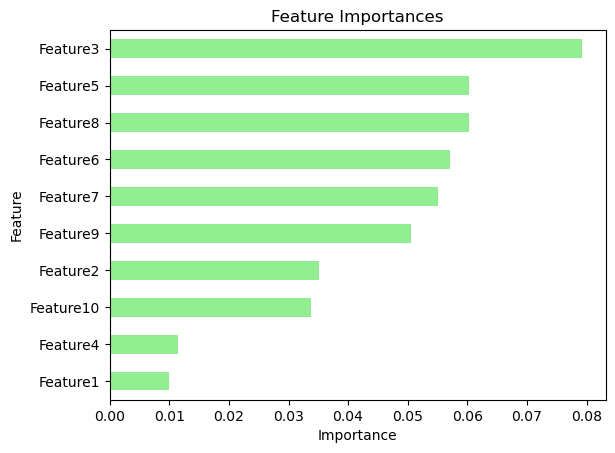

In [78]:
# Calculate feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
importances_df = pd.DataFrame(sorted(zip(importances, feature_names), reverse=False), columns=['Feature Importances', 'Feature'])

# Set the feature names as the index
importances_df.set_index('Feature', inplace=True)

# Plot feature importances
importances_df.plot(kind='barh', color='lightgreen', title='Feature Importances', legend=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()